In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import scipy
from scipy.stats import zscore


In [86]:
df1 = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/cleaned_transactions.csv")
print(df1.info())

# changing datetime columun to datetime format
df1['transactionDateTime'] = pd.to_datetime(df1['transactionDateTime'])
df1["accountOpenDate"] = pd.to_datetime(df1["accountOpenDate"])
df1['currentExpDate'] = pd.to_datetime(df1['currentExpDate'])
df1['dateOfLastAddressChange'] = pd.to_datetime(df1['dateOfLastAddressChange'])
df1['transactionDateTime'].dtype
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  float64
 10  posConditionCode          641914 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

## Summary Statistics for Numeric Columns

1. What are the min, max, mean, median, and standard deviation of:
    - transactionAmount
    - availableMoney
    - creditLimit
    - currentBalance

2. Are there outliers or unusually high/low values

In [87]:
# Question 1 
df1[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

# df1.shape


,creditLimit,availableMoney,transactionAmount,currentBalance
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,10697.210608,6652.828573,135.162497,4044.382035
std,11460.359133,9227.132275,147.053302,5945.510224
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1114.970000,32.320000,502.442500
50%,7500.000000,3578.165000,85.800000,2151.860000
75%,15000.000000,8169.185000,189.030000,5005.890000
max,50000.000000,50000.000000,1825.250000,47496.500000


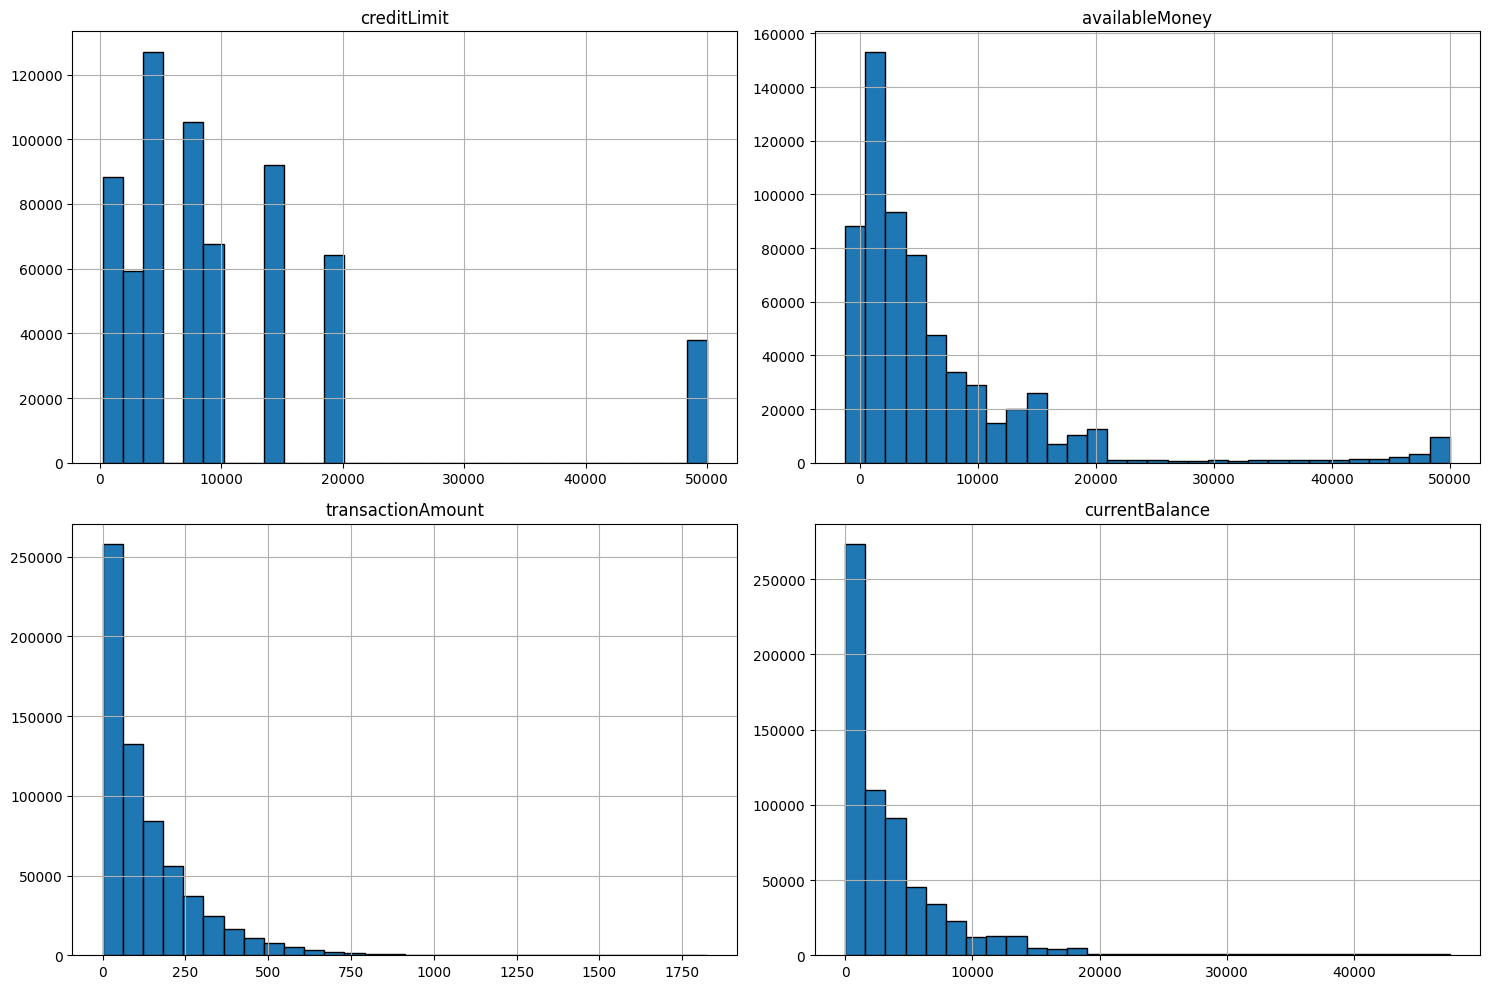

In [88]:
df1[['creditLimit','availableMoney','transactionAmount','currentBalance']].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


Insights gained
1. Based on Std
    - creditLimit : High variation. Some customers have very small limits (250) while others go up to 50000.
    - availableMoney : Wide spread, including negative balances. Suggest different usuage patterns- some maxing out cards, others preserving credit.
    - transactionAmount: Most people spend small amounts , but a few spend a lot in on ego (1825). So the spending pattern is not the same for everyone.
    - currentBalance : Again, wide variablility. Some accounts carry very low(0) while some have very high balances (47496.5)

2. Based on other statistics
    - Most customers have credit limits below 7500, with 75% under 15000. While few premium accounts with 50,000 credit limits.
    - Some accounts appear to be overdrawn (negative values), while 75% have available money below 8000
    - 75% of transactions are below 189 and likely to be everyday purchases. Some with high value like 1825 in one go.
    - Some have large current balance (47,497) while some have zero balance, average is 4,044.

## Exploring Categorical Columns

3. What are the unique values in:
    - merchantCategoryCode
    - transactionType
    - acqCountry
    - merchantCountryCode
    - merchantName
4. What are the most frequet values in those columns?
5. What are the most common merchants and merchant categories by transaction count and amount?
6. How does transaction frequency and amount vary by country, state, or city?

In [89]:
# unique method for seeing the list of unique values
print("merchantCategoryCode: ", df1['merchantCategoryCode'].unique())
print()
print("transactionType", df1['transactionType'].unique())
print()
print("acqCountry", df1['acqCountry'].unique())
print()
print("merchantName", df1['merchantName'].unique())
print()
print("merchantCountryCode", df1['merchantCountryCode'].unique())
print()
print("posEntryMode",df1['posEntryMode'].unique())
print()
print("posConditionCode", df1['posConditionCode'].unique()) 


# nunique method for count value of unique values
# Print number of unique values for each
print("merchantCategoryCode:", df1['merchantCategoryCode'].nunique())
print("transactionType:", df1['transactionType'].nunique())
print("acqCountry:", df1['acqCountry'].nunique())
print("merchantCountryCode:", df1['merchantCountryCode'].nunique())
print("merchantName:", df1['merchantName'].nunique())
print('posEntryMode',df1['posEntryMode'].nunique())
print('posConditionCode',df1['posConditionCode'].nunique())

      


merchantCategoryCode:  ['rideshare' 'online_gifts' 'personal care' 'fastfood' 'entertainment'
 'online_subscriptions' 'mobileapps' 'fuel' 'food' 'online_retail'
 'airline' 'hotels' 'food_delivery' 'cable/phone' 'subscriptions' 'auto'
 'gym' 'furniture' 'health']

transactionType ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL']

acqCountry ['US' 'PR' 'MEX' 'CAN']

merchantName ['Lyft' 'Uber' 'Fresh eCards' ... 'Runners #332755' 'Curves #440052'
 'Virgin #218063']

merchantCountryCode ['US' 'PR' 'MEX' 'CAN']

posEntryMode [ 5.  9.  2. 90. 80.]

posConditionCode [ 1.  8. 99.]
merchantCategoryCode: 19
transactionType: 3
acqCountry: 4
merchantCountryCode: 4
merchantName: 2493
posEntryMode 5
posConditionCode 3


Most Frequent (Mode) Values in These Columns

In [90]:
print("Most frequent merchantCategoryCode:\n", df1['merchantCategoryCode'].value_counts().head())
print("Most frequent transactionType:\n", df1['transactionType'].value_counts().head())
print("Most frequent acqCountry:\n", df1['acqCountry'].value_counts().head())
print("Most frequent merchantCountryCode:\n", df1['merchantCountryCode'].value_counts().head())
print("Most frequent merchantName:\n", df1['merchantName'].value_counts().head())


Most frequent merchantCategoryCode:
 merchantCategoryCode
online_retail    161469
fastfood         101196
entertainment     69138
food              68245
rideshare         50574
Name: count, dtype: int64
Most frequent transactionType:
 transactionType
PURCHASE                609274
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: count, dtype: int64
Most frequent acqCountry:
 acqCountry
US     636216
MEX      2626
CAN      1870
PR       1202
Name: count, dtype: int64
Most frequent merchantCountryCode:
 merchantCountryCode
US     636201
MEX      2636
CAN      1874
PR       1203
Name: count, dtype: int64
Most frequent merchantName:
 merchantName
Lyft          25311
Uber          25263
gap.com       13824
apple.com     13607
target.com    13601
Name: count, dtype: int64


Most Common Merchants & Merchant Categories by Transaction Count and Amount

In [91]:
# By transaction count
top_merchants_by_count = df1.groupby('merchantName').size().sort_values(ascending=False).head()
top_categories_by_count = df1.groupby('merchantCategoryCode').size().sort_values(ascending=False).head()

# By transaction amount
top_merchants_by_amount = df1.groupby('merchantName')['transactionAmount'].sum().sort_values(ascending=False).head()
top_categories_by_amount = df1.groupby('merchantCategoryCode')['transactionAmount'].sum().sort_values(ascending=False).head()

print("Top merchants by transaction count:\n", top_merchants_by_count)
print()
print("Top categories by transaction count:\n", top_categories_by_count)
print()
print("Top merchants by transaction amount:\n", top_merchants_by_amount)
print()
print("Top categories by transaction amount:\n", top_categories_by_amount)


Top merchants by transaction count:
 merchantName
Lyft          25311
Uber          25263
gap.com       13824
apple.com     13607
target.com    13601
dtype: int64

Top categories by transaction count:
 merchantCategoryCode
online_retail    161469
fastfood         101196
entertainment     69138
food              68245
rideshare         50574
dtype: int64

Top merchants by transaction amount:
 merchantName
Lyft           3686393.55
Uber           3655617.79
target.com     2016053.60
gap.com        2012939.11
oldnavy.com    1997074.48
Name: transactionAmount, dtype: float64

Top categories by transaction amount:
 merchantCategoryCode
online_retail    23621623.09
fastfood         14652056.60
food             10006006.85
entertainment     9977175.73
rideshare         7342011.34
Name: transactionAmount, dtype: float64


Transaction Frequency and Amount by Country, State, or City

In [92]:
# Frequency and amount by country
country_summary = df1.groupby('acqCountry').agg({
    'transactionAmount': ['count', 'sum', 'mean']
}).sort_values(('transactionAmount', 'count'), ascending=False)


print("Transaction summary by country:\n", country_summary.head())


Transaction summary by country:
            transactionAmount                         
                       count          sum        mean
acqCountry                                           
US                    636216  85985733.42  135.151793
MEX                     2626    353833.68  134.742452
CAN                     1870    258475.14  138.222000
PR                      1202    164656.85  136.985732


## Understanding variable (isFraud)

5. How many transactions are marked as fraud vs not fraud?
6. What is the percentage of fradulent transactions?
7. In which merchantName and merchant Category fraudulent transactions occur most?
8. In which country fraudulent transactions occur most?


In [93]:
#sorting by trasnaction time
sorted_df = df1.sort_values(by='transactionDateTime', ascending=False)

print(sorted_df.shape)

# print(sorted_df.head())

#fraud_transactions = sorted_df[sorted_df['isFraud']].value_counts() # this gives dataframe rows
fraud_transactions = sorted_df['isFraud'].value_counts()
print(fraud_transactions)

#percentage of fradulent transactions:
percentage_of_fraud = (fraud_transactions[1]/(fraud_transactions[0]+fraud_transactions[1]))*100
print(percentage_of_fraud)




(641914, 26)
isFraud
False    630612
True      11302
Name: count, dtype: int64
1.7606719903289225


C:\Users\dell\AppData\Local\Temp\ipykernel_2744\2622629816.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_of_fraud = (fraud_transactions[1]/(fraud_transactions[0]+fraud_transactions[1]))*100


In [94]:
fraud_df = df1[df1['isFraud']==True]

#Most common merchant names in frauds
top_merchants_by_fraud = fraud_df['merchantName'].value_counts().head()

top_merchantsCategories_by_fraud = fraud_df['merchantCategoryCode'].value_counts().head()

print("Top merchants in fraudulent transactions:\n", top_merchants_by_fraud)
print("Top merchant categories in fraudulent transactions: \n", top_merchantsCategories_by_fraud)

Top merchants in fraudulent transactions:
 merchantName
Uber           575
Lyft           550
alibaba.com    405
target.com     358
sears.com      348
Name: count, dtype: int64
Top merchant categories in fraudulent transactions: 
 merchantCategoryCode
online_retail    3647
fastfood         1737
food             1390
rideshare        1125
entertainment     928
Name: count, dtype: int64


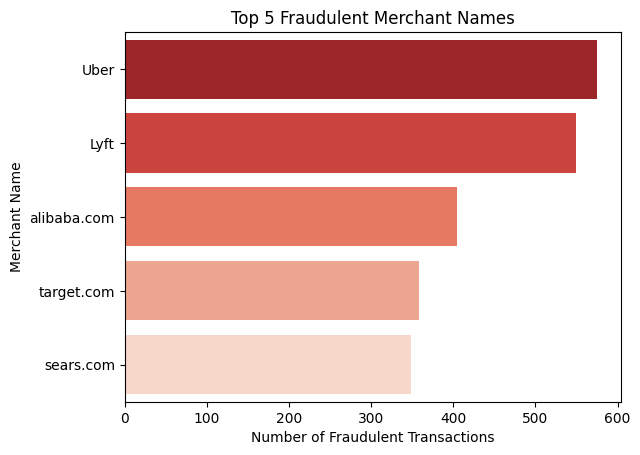

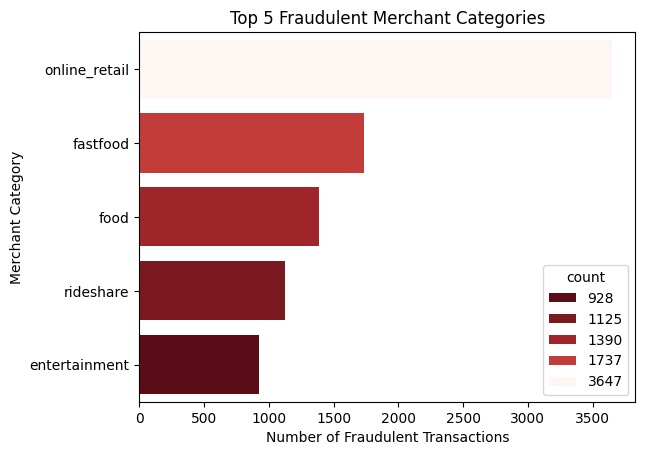

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 fraudulent merchants
sns.barplot(x=top_merchants_by_fraud.values, y=top_merchants_by_fraud.index, hue=top_merchants_by_fraud.index,palette='Reds_r')
plt.title("Top 5 Fraudulent Merchant Names")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("Merchant Name")
plt.show()

# Top 5 fraudulent merchant categories
sns.barplot(x=top_merchantsCategories_by_fraud.values, y=top_merchantsCategories_by_fraud.index, hue=top_merchantsCategories_by_fraud, palette='Reds_r')
plt.title("Top 5 Fraudulent Merchant Categories")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("Merchant Category")
plt.show()


In [96]:
# Most frequent countries for fraud
fraud_by_country = fraud_df['acqCountry'].value_counts().head()

print("Countries with most fraudulent transactions:\n", fraud_by_country)


Countries with most fraudulent transactions:
 acqCountry
US     11162
MEX       58
CAN       50
PR        32
Name: count, dtype: int64


## Account and Transactions

7. How many unique customers are there, and how many accounts per customer?
8. Which customers have the highest number of transactions?
9. What is total number of transactions?
10. Calculate fraudlent transaction frequency for each account
11. What is total number of fraudulent transactions?
12. Do certain customers/accounts have a higher rate of fradulent transactions?
13. What is overall fraud rate ?

7. How many unique customers are there, and how many accounts per customer?


In [97]:
#Unique customer and accounts count
# unique_customers= df1['customerId'].unique()
# print(f"Unique customers count: {len(unique_customers)}")
#output: 5000

unique_accounts = df1['accountNumber'].unique()
print(f"unique_accounts count: {len(unique_accounts)}")
#output: 5000

#(df1['customerId'] == df1['accountNumber']).all()
#checked row by row if both are same and found true

#df1 = df1.drop('customerId', axis=1)
#dropped the customerID column
df1.info()


unique_accounts count: 5000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-

8. Which customers have the highest number of transactions?
9. What is total number of transactions?

In [98]:


# This counts all rows per account, including those with transactionAmount == 0
total_transactions_frequency = sorted_df.groupby('accountNumber').size().reset_index(name='transaction_count')
print("Total Transactions Frequency:")
print(total_transactions_frequency)

print("Top 10 Highest transaction count and account number")
print(total_transactions_frequency.sort_values(by='transaction_count', ascending=False).head(10).reset_index(drop=True))

print(f"\n🔢 Total number of transactions across all accounts: {total_transactions_frequency['transaction_count'].sum()}")



Total Transactions Frequency:
      accountNumber  transaction_count
0         100547107                 85
1         100634414                 24
2         100973869                 46
3         101192712                 20
4         101548993                 29
...             ...                ...
4995      999273501                  8
4996      999275549                230
4997      999789077                 72
4998      999984515                 32
4999      999985343                104

[5000 rows x 2 columns]
Top 10 Highest transaction count and account number
   accountNumber  transaction_count
0      318001076              10034
1      456044564               8382
2      812328116               5494
3      838085703               5129
4      239875038               4705
5      877017103               4435
6      278064853               4227
7      353215513               3756
8      314506271               3410
9      917216469               3258

🔢 Total number of transactio

AccountNumber : 318001076 does highest number of transaction in year 2016 i.e. 10,034

9. Calculate fraudlent transaction frequency for each account
10. What is total number of fraudulent transactions?



In [99]:

# Fraud transactions frequency
fraud_transactions_frequency = (
    sorted_df.groupby("accountNumber")['isFraud']
    .sum()
    .reset_index()
    .rename(columns={'isFraud': 'fraud_count'})
)
print(fraud_transactions_frequency)

# Now sort the DataFrame by the newly named column
print("Top 10 Highest fraudulent transaction count and account number")
print(fraud_transactions_frequency.sort_values(by='fraud_count', ascending=False).head(10).reset_index(drop=True))

print(f"🚨 Total number of fraudulent transactions across all accounts: {fraud_transactions_frequency['fraud_count'].sum()}")

sorted_df.info()
fraud_transactions_frequency.info()



      accountNumber  fraud_count
0         100547107            1
1         100634414            0
2         100973869            0
3         101192712            0
4         101548993            0
...             ...          ...
4995      999273501            0
4996      999275549            4
4997      999789077            1
4998      999984515            0
4999      999985343            0

[5000 rows x 2 columns]
Top 10 Highest fraudulent transaction count and account number
   accountNumber  fraud_count
0      311710839          302
1      318001076          291
2      353215513          205
3      251625315          142
4      822203001          118
5      456044564           95
6      717128593           81
7      877017103           78
8      200778999           76
9      931013168           74
🚨 Total number of fraudulent transactions across all accounts: 11302
<class 'pandas.core.frame.DataFrame'>
Index: 641914 entries, 216693 to 166842
Data columns (total 26 columns):
 #   C

11. What is fraud rate per account?
12. Do certain customers/accounts have a higher rate of fradulent transactions?
13. What is overall fraud rate ?

In [100]:
# Merge the two DataFrames on 'accountNumber'
merged_data = pd.merge(total_transactions_frequency, fraud_transactions_frequency, on='accountNumber', how='left')

# Calculate the percentage of fraudulent transactions per account
merged_data['fraud_percentage'] = (merged_data['fraud_count'] / merged_data['transaction_count']) * 100

# Handling missing fraud counts: Replace NaN with 0 (if an account has no fraud)
merged_data['fraud_percentage'] = merged_data['fraud_percentage'].fillna(0)

# Print the percentage of fraudulent transactions for the top 10 accounts, along with accountNumber
print("Top 10 Accounts with highest fraud percentage and their fraud percentage")
print(merged_data[['accountNumber', 'fraud_percentage']].sort_values(by='fraud_percentage', ascending=False).head(10).reset_index(drop=True))

# ✅ Total number of transactions in the entire dataset
total_transactions = total_transactions_frequency['transaction_count'].sum()

# ✅ Total number of fraudulent transactions
fraud_transactions_frequency['fraud_count'] = fraud_transactions_frequency['fraud_count'].fillna(0)
total_fraud_transactions = fraud_transactions_frequency['fraud_count'].sum()
print(f"🚨 Total number of fraudulent transactions across all accounts: {int(total_fraud_transactions)}")

overall_fraud_rate = (total_fraud_transactions / total_transactions) * 100
print(f"⚠️ Overall fraud rate in the dataset: {overall_fraud_rate:.2f}%")

print(merged_data.info())



Top 10 Accounts with highest fraud percentage and their fraud percentage
   accountNumber  fraud_percentage
0      981286839        100.000000
1      638423733         50.000000
2      704819779         42.682927
3      509442666         33.333333
4      625998940         33.333333
5      938310147         31.606218
6      163457367         31.578947
7      340949807         30.769231
8      234537883         26.595745
9      930431098         25.352113
🚨 Total number of fraudulent transactions across all accounts: 11302
⚠️ Overall fraud rate in the dataset: 1.76%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accountNumber      5000 non-null   int64  
 1   transaction_count  5000 non-null   int64  
 2   fraud_count        5000 non-null   int64  
 3   fraud_percentage   5000 non-null   float64
dtypes: float64(1), int64(3)
memory

Is there a difference in spending behavior between fraudulent and non-fraudulent transactions?

In [101]:
summary_stats = sorted_df.groupby('isFraud')['transactionAmount'].describe()
print(summary_stats)


            count        mean         std  min     25%      50%       75%  \
isFraud                                                                     
False    630612.0  133.416128  145.583066  0.0  31.810   84.340  186.4400   
True      11302.0  232.603744  189.654934  0.0  91.475  185.215  324.8175   

             max  
isFraud           
False    1825.25  
True     1743.51  


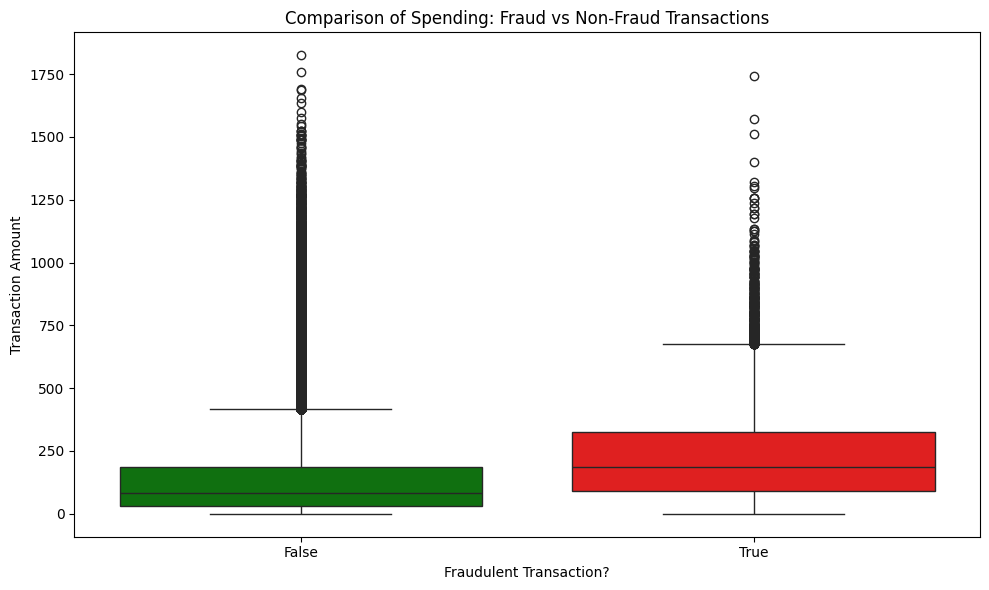

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=sorted_df, x='isFraud', y='transactionAmount', hue='isFraud', palette={False: 'green', True: 'red'}, legend=False)
plt.xlabel('Fraudulent Transaction?')
plt.ylabel('Transaction Amount')
plt.title('Comparison of Spending: Fraud vs Non-Fraud Transactions')
plt.tight_layout()
plt.show()


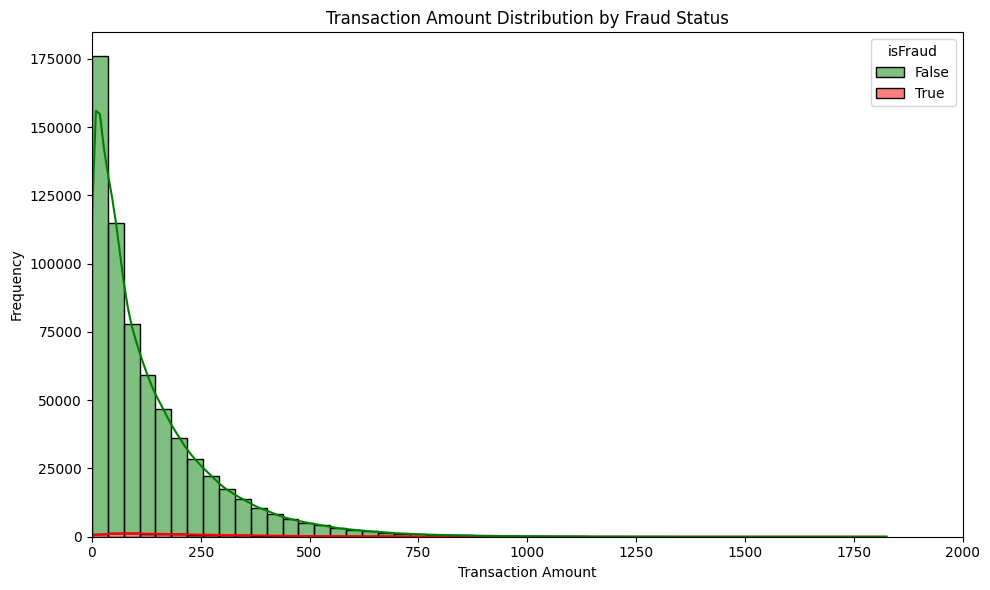

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sorted_df, x='transactionAmount', hue='isFraud', bins=50, kde=True, palette={False: 'green', True: 'red'}, multiple='stack')
plt.xlim(0, 2000)  # Set the upper limit of transaction amount to 2000
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.tight_layout()
plt.show()


Insights
1. Highest number of transaction is 10,034 by account number 318001076.
2. Highest number of fraudulent transaction is 302 by account number 311710839.
3. Fraud_percentage is 100% for account 981286839 , and 50% for account 638423733.
4. Total number of transactions acroll all accounts: 641914
5. Total number of fraudulent transactions across all accounts: 11302
6. Overall fraud rate is 1.76%.

More on comparing fraudulent and non fraudulent transactions
1. Fraudulent transactions are, on average, higher in value. (Based on mean)
2. Fraudulent transactions also have greater variability - not only are they larger on average, but also more unpredictable. (Based on SD)
3. Median for frauds is more than double that of non-frauds. Median is more resistant to outliers, so this confirms fraud transactions are genuinely higher, not just due to a few big outliers.
4. 75% of non-fraud transactions are under 186.44 but 75% of frauds go up to 324.82.
5. The maximum transaction values are comparable - large outliers happend in both categories.

How many transaction are done by the accountNumber 981286839 and other top accounts with highest fraud percentage in the year 2016.

In [104]:
merged_data.info()

merged_data.sort_values(by='fraud_percentage',ascending=False).head(10).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accountNumber      5000 non-null   int64  
 1   transaction_count  5000 non-null   int64  
 2   fraud_count        5000 non-null   int64  
 3   fraud_percentage   5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


,accountNumber,transaction_count,fraud_count,fraud_percentage
0,981286839,1,1,100.000000
1,638423733,2,1,50.000000
2,704819779,82,35,42.682927
3,509442666,6,2,33.333333
4,625998940,6,2,33.333333
5,938310147,193,61,31.606218
6,163457367,19,6,31.578947
7,340949807,13,4,30.769231
8,234537883,94,25,26.595745
9,930431098,71,18,25.352113


What is the highest transaction amount?
What is the distribution of transactionAmount? Are there any outliers?
What is the overall transaction amount and top accounts by that?

In [105]:
print("Highest transaction amount is :")
print(sorted_df['transactionAmount'].max())
print("Lowest transaction amount is: ")
print(sorted_df['transactionAmount'].min())

Highest transaction amount is :
1825.25
Lowest transaction amount is: 
0.0


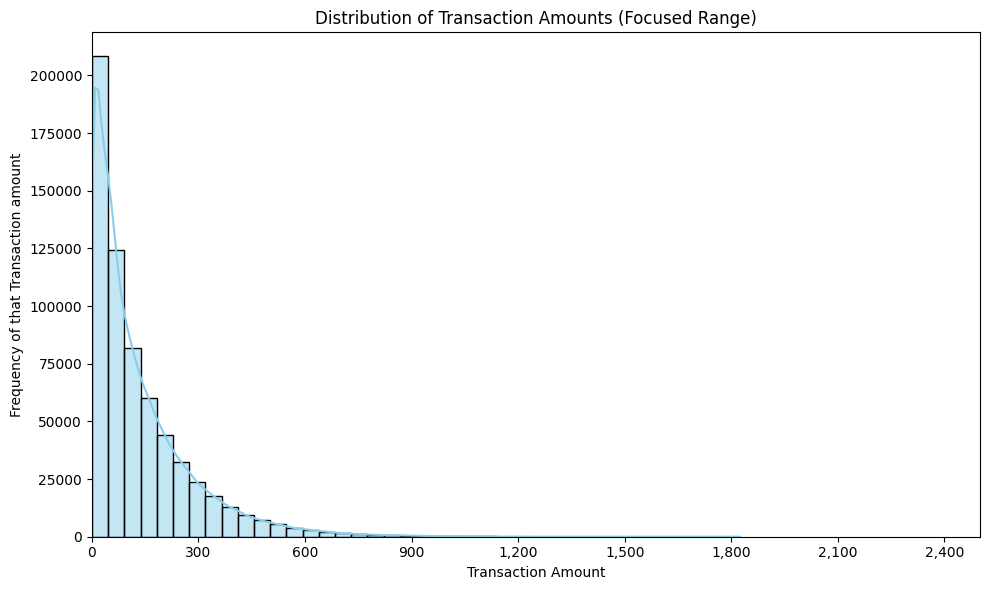

In [106]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=sorted_df, x='transactionAmount', bins=40, kde=True, color='skyblue')

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set x-axis limits and tick intervals
plt.xlim(0, 2500)
plt.xticks(range(0, 2501, 300))  # Set ticks every 100 units

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency of that Transaction amount')
plt.title('Distribution of Transaction Amounts (Focused Range)')
plt.tight_layout()
plt.show()


In [107]:
# merged_data.drop(columns='transaction_amount_overall', inplace=True)

# merged_data.info()

# Remove old column first if it exists
if 'transaction_amount_overall' in merged_data.columns:
    merged_data.drop(columns='transaction_amount_overall', inplace=True)

# Calculate transaction amount per account
transaction_amount_overall = sorted_df.groupby('accountNumber')['transactionAmount'].sum().reset_index()

# Rename before merging to avoid conflict
transaction_amount_overall.rename(columns={'transactionAmount': 'transaction_amount_overall'}, inplace=True)

# Merge cleanly
merged_data = pd.merge(merged_data, transaction_amount_overall, on='accountNumber', how='left')

top_accounts = merged_data.sort_values(by='transaction_amount_overall', ascending=False).head(10).reset_index(drop=True)
print(top_accounts[['accountNumber', 'transaction_amount_overall']])


min_accounts = merged_data.sort_values(by='transaction_amount_overall', ascending=True).head(10).reset_index(drop=True)
print(min_accounts[["accountNumber", "transaction_amount_overall"]])

merged_data.describe()

   accountNumber  transaction_amount_overall
0      318001076                  1457470.51
1      456044564                  1204157.36
2      812328116                   790393.13
3      838085703                   725396.56
4      239875038                   682537.27
5      877017103                   630423.45
6      278064853                   596959.43
7      353215513                   558229.97
8      314506271                   496193.63
9      917216469                   479170.53
   accountNumber  transaction_amount_overall
0      702306492                        0.00
1      981286839                        2.21
2      406722896                        3.00
3      793451714                        3.25
4      924628692                        3.57
5      800578637                        6.62
6      981518869                        8.08
7      510840883                       12.04
8      339328179                       15.59
9      250504933                       17.16


,accountNumber,transaction_count,fraud_count,fraud_percentage,transaction_amount_overall
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,5.518011e+08,128.382800,2.260400,1.450996,1.735254e+04
std,2.585887e+08,343.546801,9.137751,3.181674,4.973709e+04
min,1.005471e+08,1.000000,0.000000,0.000000,0.000000e+00
25%,3.255578e+08,22.000000,0.000000,0.000000,1.897335e+03
50%,5.527742e+08,47.000000,0.000000,0.000000,5.295595e+03
75%,7.771866e+08,108.000000,2.000000,1.923077,1.436336e+04
max,9.999853e+08,10034.000000,302.000000,100.000000,1.457471e+06


The highest transaction amount in one go is 1825.25 rupees.

Account with overall highest transaction about over the year is AccountNumber 318001076 with amount 14,57,470.51.


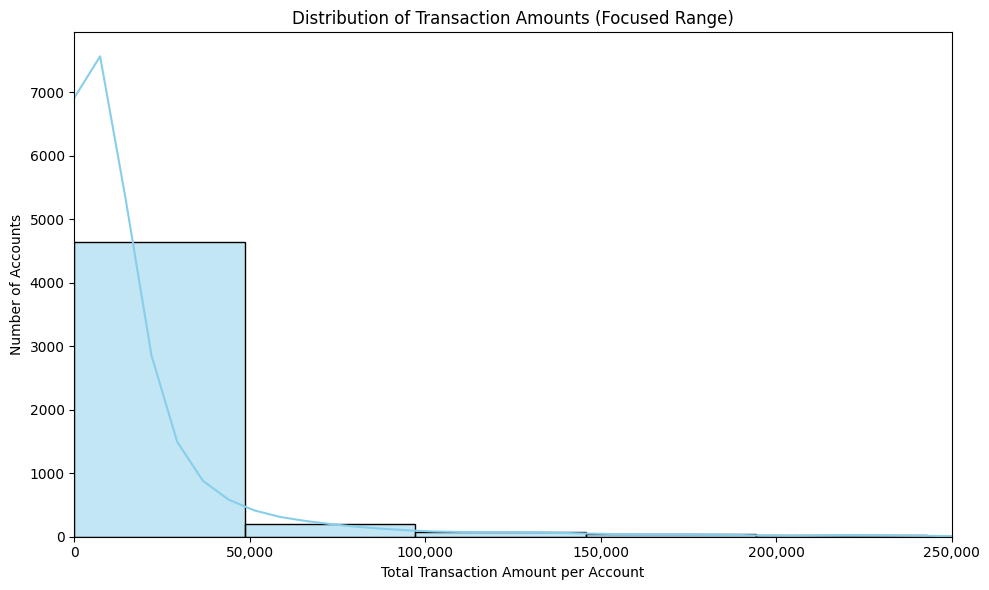

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# Filter for realistic range (e.g., 0 to 15,000)
sns.histplot(data=merged_data, x='transaction_amount_overall', bins=30, kde=True, color='skyblue')

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set x-axis limits based on your actual data range
plt.xlim(0, 250000)  # You can adjust the upper limit if needed

plt.xlabel('Total Transaction Amount per Account')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Transaction Amounts (Focused Range)')
plt.tight_layout()
plt.show()


## Customer, CVV, expirationDate

14. Normally after how long time of opening account the address is changed?
15. From today's date it we see which are the oldest and newest accounts
16. In which day maximum accounts are opened?
17. Check enteredCVV and cardCVV mismatches, and calculate percentage of mismatch
18. Compare cvv_mismatch and isFraud using crosstab (or contingency table) 
19. Compare expirationDateKeyInMatch with isFraud using crosstab
20. Whose customers card expiration date is near?


In [134]:
# List of columns related to customer information
customer_columns = [
    'accountNumber',
    'customerId',
    'creditLimit',
    'availableMoney',
    'cardCVV',
    'enteredCVV',
    'cardLast4Digits',
    'currentExpDate',
    'accountOpenDate',
    'dateOfLastAddressChange',
    'currentBalance',
    'expirationDateKeyInMatch',
    'cardPresent'
]

# # # Create the customer DataFrame
# customer_df = df1[customer_columns].drop_duplicates(subset='accountNumber').reset_index(drop=True)

customer_df = df1.sort_values(by='transactionDateTime', ascending=False) \
                 .drop_duplicates(subset='accountNumber') \
                 .reset_index(drop=True)


print(customer_df[['availableMoney', 'creditLimit', 'currentBalance']].describe())

# # Preview the DataFrame
# print("Customer DataFrame:")
# print(customer_df.head())

# print(
#     customer_df[['accountNumber', 'currentBalance']]       # Select only these two columns
#     .sort_values(by='currentBalance', ascending=False)     # Sort by currentBalance (highest first)
#     .reset_index(drop=True)                                # Reset index after sorting (drop old index)
#     .head()                                                # Show top 5 rows
# )

# # print(df1.info())

print(df1[['availableMoney', 'creditLimit', 'currentBalance', 'transactionAmount']].describe())
print(customer_df[['accountNumber','currentBalance']].sort_values(by='currentBalance',ascending=False).head().reset_index(drop=True))


       availableMoney   creditLimit  currentBalance
count     5000.000000   5000.000000     5000.000000
mean      7864.428834  10226.500000     2362.071166
std      10093.711292  10849.210286     3803.040561
min       -468.610000    250.000000        0.000000
25%       1395.765000   5000.000000      192.067500
50%       4760.715000   7500.000000      925.005000
75%       9990.122500  15000.000000     3167.830000
max      50000.000000  50000.000000    47076.710000
       availableMoney    creditLimit  currentBalance  transactionAmount
count   641914.000000  641914.000000   641914.000000      641914.000000
mean      6652.828573   10697.210608     4044.382035         135.162497
std       9227.132275   11460.359133     5945.510224         147.053302
min      -1244.930000     250.000000        0.000000           0.000000
25%       1114.970000    5000.000000      502.442500          32.320000
50%       3578.165000    7500.000000     2151.860000          85.800000
75%       8169.185000   1500

14. Normally after how long time of opening account the address is changed?

In [110]:
customer_df['add_change_gap'] = (customer_df['dateOfLastAddressChange']- customer_df['accountOpenDate']).dt.days
print(customer_df[['accountNumber','add_change_gap']].sort_values(by='add_change_gap', ascending=False).reset_index(drop=True).head(10))

average_gap = customer_df['add_change_gap'].mean()
print(f"\nOverall average address change gap (in days): {average_gap: .2f}")

print("After opening account how many customer have changed the address")
changed_after_opening = customer_df[customer_df['add_change_gap']>0]

print(f"\nNumber of customers who changed the address after opening account: {changed_after_opening.shape[0]} ")
print(changed_after_opening[['accountNumber','add_change_gap']].sort_values(by='add_change_gap',ascending=True).reset_index(drop=True))

   accountNumber  add_change_gap
0      778536189            4311
1      626616792            4222
2      462201332            4211
3      616967429            4178
4      801168702            4177
5      333625526            3956
6      992898175            3954
7      104931978            3633
8      739341340            3622
9      817417193            3612

Overall average address change gap (in days):  199.89
After opening account how many customer have changed the address

Number of customers who changed the address after opening account: 1071 
      accountNumber  add_change_gap
0         173971251              26
1         393245351              44
2         981136925              52
3         275541201              53
4         280983864              55
...             ...             ...
1066      801168702            4177
1067      616967429            4178
1068      462201332            4211
1069      626616792            4222
1070      778536189            4311

[1071 rows

15. From today's date it we see which are the oldest and newest accounts

In [111]:
#customer_df = customer_df.drop(columns=['accountAge'])
today = pd.Timestamp.today()
customer_df['accountAge'] = (today - customer_df['accountOpenDate']).dt.days

print("\nTop 5 oldest accounts:")
print(customer_df[['accountNumber','accountOpenDate','accountAge']]
      .sort_values(by='accountAge', ascending=False)
      .reset_index(drop=True)
      .head())

print("\nTop 5 new accounts")
print(customer_df[['accountNumber','accountOpenDate','accountAge']]
      .sort_values(by='accountAge',ascending=True)
      .reset_index(drop=True)
      .head())

#Oldest account
oldest_account = customer_df.loc[customer_df['accountAge'].idxmax()]
print(f"\n The oldest account is:\nAccount Number: {oldest_account['accountNumber']},"
      f"Opened on: {oldest_account['accountOpenDate'].date()} ,"
      f" Age: {oldest_account['accountAge']} days ")

#finding the newest account

newest_account = customer_df.loc[customer_df['accountAge'].idxmin()]

print(f"\n The newest account is:\nAccount Number: {newest_account['accountNumber']},"
      f"Opened on: {newest_account['accountOpenDate'].date()} ,"
      f" Age: {newest_account['accountAge']} days ")


Top 5 oldest accounts:
   accountNumber accountOpenDate  accountAge
0      789836144      1985-12-25       14377
1      367184291      2000-09-29        8985
2      414475732      2000-11-16        8937
3      347596074      2002-08-15        8300
4      719425571      2002-10-20        8234

Top 5 new accounts
   accountNumber accountOpenDate  accountAge
0      605704714      2015-12-31        3414
1      477081008      2015-12-31        3414
2      890796581      2015-12-31        3414
3      783343390      2015-12-31        3414
4      431354281      2015-12-31        3414

 The oldest account is:
Account Number: 789836144,Opened on: 1985-12-25 , Age: 14377 days 

 The newest account is:
Account Number: 890796581,Opened on: 2015-12-31 , Age: 3414 days 


16. In which day maximum accounts are opened?

In [138]:
account_open_day_counts = customer_df.groupby('accountOpenDate').size()

max_open_day = account_open_day_counts.idxmax()
max_open_count = account_open_day_counts.max()

print("\n Top 5 days with most account openings:")
print(account_open_day_counts.sort_values(ascending=False).head())

print(f"The maximum number of accounts were opened on {max_open_day.date()},with {max_open_count} accounts.")

print("Average count of accounts opened in a day:", account_open_day_counts.mean())
print("Minimum count of acounts opened in a day:", account_open_day_counts.min())


 Top 5 days with most account openings:
accountOpenDate
2015-11-21    13
2015-12-26    13
2015-11-01    13
2015-09-22    12
2015-05-08    12
dtype: int64
The maximum number of accounts were opened on 2015-11-01,with 13 accounts.
Average count of accounts opened in a day: 2.738225629791895
Minimum count of acounts opened in a day: 1


17. Check mismatches between entered CVV and actual CVV and calculate mismatch_percentage



In [140]:
# Step 1: Create a new column to mark mismatches between entered and actual CVV
sorted_df['cvv_mismatch'] = sorted_df['enteredCVV'] != sorted_df['cardCVV']

print("Account Number and corresponding: cvv_mismatch counts")
print(sorted_df.groupby('accountNumber')['cvv_mismatch'].sum().sort_values(ascending=False))

# Step 2: Group by account and calculate total transactions and mismatches
fraudulent_df = sorted_df.groupby('accountNumber').agg(
    total_transactions=('cvv_mismatch', 'count'),
    mismatch_count=('cvv_mismatch', 'sum')
).reset_index()

# Step 3: Calculate percentage of mismatches
fraudulent_df['mismatch_percentage'] = (fraudulent_df['mismatch_count'] / fraudulent_df['total_transactions']) * 100



#fradulent_df only contains those accounts whose cvv mismatch_percentage is greater than 0

fraudulent_df = fraudulent_df[fraudulent_df['mismatch_percentage']>0]

print(fraudulent_df.sort_values(by='mismatch_percentage',ascending=False).head(10).reset_index(drop=True))

# Filter accounts with more than 10% mismatch, then sort by mismatch percentage
print(fraudulent_df[fraudulent_df['mismatch_percentage'] > 10].sort_values(by='mismatch_percentage', ascending=False).head(40).reset_index(drop=True))








Account Number and corresponding: cvv_mismatch counts
accountNumber
318001076    83
456044564    72
812328116    59
838085703    54
877017103    54
             ..
101970909     0
102085969     0
102307135     0
102537526     0
102635965     0
Name: cvv_mismatch, Length: 5000, dtype: int64
   accountNumber  total_transactions  mismatch_count  mismatch_percentage
0      890964842                  23              22            95.652174
1      238223440                  10               9            90.000000
2      697174743                  16              13            81.250000
3      880748396                  14              11            78.571429
4      116649028                   4               3            75.000000
5      324884038                  13               8            61.538462
6      716448276                  37              22            59.459459
7      628545009                  23              13            56.521739
8      827592181                  50       

We checked for enteredCVV and  cardCVV mismatch, first we counted the total transactions number and then mismatch count for each account number and then grouped those accounts whose mismatch_percentage is greater than 0 in a dataframe fradulent_df.

In fradulent_df one account with 95.65% mismatch rate, similary 39 accounts with mismatch rate above 10%.



18. Now check cardpresent = False case

In [114]:
# Step 1: Check distinct values in 'cardPresent' column
print(sorted_df['cardPresent'].unique())
print(sorted_df['cardPresent'].value_counts(dropna=False))

# Step 2: Filter data for card-absent transactions
card_absent_df = sorted_df[sorted_df['cardPresent'] == False]

# Step 3: Group and compute mismatch stats for card-absent transactions
fraudulent_card_absent_df = card_absent_df.groupby('accountNumber').agg(
    total_transactions_card_absent=('cvv_mismatch', 'count'),
    cvv_mismatch_count_card_absent=('cvv_mismatch', 'sum')
).reset_index()

# Step 4: Calculate mismatch percentage
fraudulent_card_absent_df['cvv_mismatch_percentage_card_absent'] = (
    fraudulent_card_absent_df['cvv_mismatch_count_card_absent'] / fraudulent_card_absent_df['total_transactions_card_absent']
) * 100


total_mismatches_while_card_absent = card_absent_df['cvv_mismatch'].sum()
print("Total CVV mismatches (card absent):", total_mismatches_while_card_absent)

# Step 6: Calculate totals
total_transactions = fraudulent_card_absent_df['total_transactions_card_absent'].sum()
total_mismatches = fraudulent_card_absent_df['cvv_mismatch_count_card_absent'].sum()

# Step 7: Calculate overall percentage
overall_mismatch_percentage = (total_mismatches / total_transactions) * 100

# Step 8: Create a summary row as a DataFrame
summary_row = pd.DataFrame({
    'accountNumber': ['TOTAL'],
    'total_transactions_card_absent': [total_transactions],
    'cvv_mismatch_count_card_absent': [total_mismatches],
    'cvv_mismatch_percentage_card_absent': [overall_mismatch_percentage]
})

# Step 9: Append the summary row to the original DataFrame
fraudulent_card_absent_df = pd.concat([fraudulent_card_absent_df, summary_row], ignore_index=True)

# # Step 10: Print the final DataFrame
# print(fraudulent_df1)

# print("Top 20 accounts with card absent and high cvv mismatch rate")
# print(fraudulent_df1.sort_values(by='cvv_mismatch_percentage_card_absent', ascending=False).head(20).reset_index(drop=True))

print("Creating fraudulent_df2 to store data for cvv_mismatch_percentage_card_absent greater than 10%")

fraudulent_card_absent_df1 = fraudulent_card_absent_df[fraudulent_card_absent_df['cvv_mismatch_percentage_card_absent']>10]
print(fraudulent_card_absent_df1.sort_values(by='cvv_mismatch_percentage_card_absent',ascending=False).reset_index(drop=True))


[ True False]
cardPresent
False    340453
True     301461
Name: count, dtype: int64


Total CVV mismatches (card absent): 3120
Creating fraudulent_df2 to store data for cvv_mismatch_percentage_card_absent greater than 10%
   accountNumber  total_transactions_card_absent  \
0      238223440                               9   
1      443926651                               1   
2      697174743                              14   
3      628545009                              14   
4      773192558                              10   
5      880748396                              13   
6      966761447                               4   
7      116649028                               4   
8      626702583                               7   
9      380988777                               9   
10     369024894                              11   
11     897359425                               2   
12     519440473                              17   
13     560627602                              22   
14     257955599                              30   
15     466578513                

1. Total transaction with card not present( card absent) are: 340453
2. Total trasnaction with card absent and cvvMismatch are: 3120
3. For this case cvv_mismatch_percentage_card_present > 10 are kept in dataframe: fraudulent_card_absent_df1
4. There are accounts with 100% mismatch percentage (238223440 - 9/9), (443926651 - 1/1)

19. cardPresent = True case

In [115]:
# Step 1: Filter data for card-present transactions
card_present_df = sorted_df[sorted_df['cardPresent'] == True]

# Step 2: Group and compute CVV mismatch stats for card-present transactions
fraudulent_card_present_df = card_present_df.groupby('accountNumber').agg(
    total_transactions_card_present=('cvv_mismatch', 'count'),
    cvv_mismatch_count_card_present=('cvv_mismatch', 'sum')
).reset_index()

# Step 3: Calculate mismatch percentage
fraudulent_card_present_df['cvv_mismatch_percentage_card_present'] = (
    fraudulent_card_present_df['cvv_mismatch_count_card_present'] / fraudulent_card_present_df['total_transactions_card_present']
) * 100

# Step 4: Add summary row (totals)
summary_row_present = pd.DataFrame({
    'accountNumber': ['TOTAL'],
    'total_transactions_card_present': [fraudulent_card_present_df['total_transactions_card_present'].sum()],
    'cvv_mismatch_count_card_present': [fraudulent_card_present_df['cvv_mismatch_count_card_present'].sum()],
    'cvv_mismatch_percentage_card_present': [
        (fraudulent_card_present_df['cvv_mismatch_count_card_present'].sum() / 
         fraudulent_card_present_df['total_transactions_card_present'].sum()) * 100
    ]
})

fraudulent_card_present_df = pd.concat([fraudulent_card_present_df, summary_row_present], ignore_index=True)
print(fraudulent_card_present_df)

# Step 5: Filter accounts with >10% mismatch
fraudulent_card_present_df1 = fraudulent_card_present_df[
    fraudulent_card_present_df['cvv_mismatch_percentage_card_present'] > 10
]

# Display results
print(fraudulent_card_present_df1.sort_values(by='cvv_mismatch_percentage_card_present', ascending=False).reset_index(drop=True).head(10))


     accountNumber  total_transactions_card_present  \
0        100547107                               74   
1        100634414                                6   
2        100973869                                2   
3        101548993                               22   
4        101660233                               32   
...            ...                              ...   
4513     999246377                               29   
4514     999789077                               46   
4515     999984515                               25   
4516     999985343                               58   
4517         TOTAL                           301461   

      cvv_mismatch_count_card_present  cvv_mismatch_percentage_card_present  
0                                   1                              1.351351  
1                                   0                              0.000000  
2                                   0                              0.000000  
3                          

1. Total transaction with card present are: 301461
2. Total trasnaction with card present and cvvMismatch are: 2817
3. For this case cvv_mismatch_percentage_card_present > 10 are kept in dataframe: fraudulent_card_present_df1
4. There are accounts with 100% mismatch percentage (140105230 - 11/11), (380948187 - 1/1), (386190390 - 1/1)




20. CVV Mismatch and isFraud Comparison

In [116]:
sorted_df.shape
sorted_df.columns
fraud_crosstab = pd.crosstab(
    sorted_df['cvv_mismatch'],
    sorted_df['isFraud'],
    rownames=['CVV Mismatch'],
    colnames=['Is Fraud'],
    margins=True  # adds totals for rows and columns
)

print(fraud_crosstab)


Is Fraud       False   True     All
CVV Mismatch                       
False         624870  11107  635977
True            5742    195    5937
All           630612  11302  641914


Most transactions (635,977 out of 641,914) did not have a CVV mismatch.

CVV mismatch occurred in only ~0.92% of transactions (5937 / 641914).

Fraud rate when CVV matched:

11,107 / 635,977 ≈ 1.75%

Fraud rate when CVV mismatched:

195 / 5,937 ≈ 3.28%



21. expirationDateKeyInMatch and isFraud comparison

In [117]:

print(sorted_df['expirationDateKeyInMatch'].unique())

sorted_df["expirationDateKeyInMatch"].value_counts()
expiration_fraud_crosstab_percent = pd.crosstab(
    sorted_df['expirationDateKeyInMatch'],
    sorted_df['isFraud'],
    rownames=['expiration_Mismtach'],
    colnames=['Is Fraud'],
    margins=True  # adds totals for rows and columns
)

print(expiration_fraud_crosstab_percent)

[False  True]
Is Fraud              False   True     All
expiration_Mismtach                       
False                629656  11289  640945
True                    956     13     969
All                  630612  11302  641914


Observations:
1. Only 969 transactions had an expiration date mismatch — a very small fraction (~0.15%) of total transactions.
2. Fraud rate when expiration matched: 11289/640945 =  approx. 1.76%
3. Fraud rate when expiration mismatched: 13/969 = approx. 1.34%


❗ Insight:
Surprisingly, the fraud rate is slightly lower when expiration mismatches occur (1.34%) than when they match (1.76%).

This suggests that expiration date mismatches are not a strong indicator of fraud in dataset


## posEntryMode and posConditionCode Information

11. What are the most frequent POS entry modes?
12. Is fraud more common in any particular entry mode?
13. Are online (keyed) vs card-present( swiped/tapped) entry modes associated with different transaction amounts?
14. What are the most common POS condition codes?
15. How different condition codes relate to fraud?
16. Are some condition codes tried to specific merchant categories or regions?

11. What are the most frequent POS entry modes?

In [118]:
sorted_df['posEntryMode'].value_counts()

posEntryMode
5.0     258960
9.0     193193
2.0     160589
90.0     16251
80.0     12921
Name: count, dtype: int64

Most frequent POS Entry Modes are 5 (chip read), 9(Manual entry), and 2 (Magnetic Strip swipe).

12. Is fraud more common in any particular entry mode?

In [119]:
fraud_by_entry = (sorted_df.groupby('posEntryMode')['isFraud'].mean()*100).sort_values(ascending = False)
print(fraud_by_entry)

posEntryMode
9.0     2.788403
90.0    2.018337
2.0     1.905485
80.0    1.462735
5.0     0.902842
Name: isFraud, dtype: float64


Yes, Fraud rate is more common in Manual Entry(9) 2.7% and Advanced methods (QR, bluetooth , wallets ->90) 2.01 %.

13. Are online (keyed) vs card-present( swiped/tapped) entry modes associated with different transaction amounts?

In [120]:
sorted_df['entry_mode'] = sorted_df['cardPresent'].map({True: 'Card Present', False: 'Online/Keyed'})
entry_mode_stats = sorted_df.groupby('entry_mode')['transactionAmount'].describe()
print(entry_mode_stats)


                 count        mean         std  min    25%    50%     75%  \
entry_mode                                                                  
Card Present  301461.0  141.927444  146.519247  0.0  40.45  92.42  195.77   
Online/Keyed  340453.0  129.172338  147.265608  0.0  23.15  79.76  182.53   

                  max  
entry_mode             
Card Present  1743.51  
Online/Keyed  1825.25  


14. What are the most common POS condition codes?

In [121]:
sorted_df['posConditionCode'].value_counts()

posConditionCode
1.0     514431
8.0     121507
99.0      5976
Name: count, dtype: int64

Customer present (Chip read or magnetic swipe can be used) is most common POS condition followed by Mail/Phone/Online Order (card-not-present).


15. How different condition codes relate to fraud?

In [122]:
fraud_by_condition = (sorted_df.groupby('posConditionCode')['isFraud'].mean()*100).sort_values(ascending = False)
print(fraud_by_condition)

posConditionCode
99.0    3.681392
1.0     1.826484
8.0     1.387574
Name: isFraud, dtype: float64


99.0	Unknown or other — This might be used when the system can’t determine the condition of the transaction. This could also represent some fraudulent or suspicious activity or any conditions that don’t fit into the usual categories.

Approx 3.68 percentage of fraudulent in posConditionCode 99, followed by approx. 1.82 in posConditionCode 1 and at last for 8.

16. Are some condition codes tried to specific merchant categories or regions?

In [123]:
pd.crosstab(sorted_df['posConditionCode'], sorted_df['merchantCategoryCode'])

merchantCategoryCode,airline,auto,cable/phone,entertainment,fastfood,food,food_delivery,fuel,furniture,gym,health,hotels,mobileapps,online_gifts,online_retail,online_subscriptions,personal care,rideshare,subscriptions
posConditionCode,,,,,,,,,,,,,,,,,,,
1.0,8012,8149,1124,55336,81049,54621,4191,18303,6260,2287,11510,18330,11622,26364,129351,9150,13552,40552,14668
8.0,1881,1905,355,13177,19202,12958,752,4111,1484,570,2715,4350,2826,6341,30585,1994,3203,9577,3521
99.0,97,93,11,625,945,666,47,152,69,17,119,199,166,340,1533,103,162,445,187


This shows all transaction are happening mostly through posConditionCode 1 (customer present) in all merchant category.

By Region

In [124]:
pd.crosstab(sorted_df['posConditionCode'], sorted_df['acqCountry'])


acqCountry,CAN,MEX,PR,US
posConditionCode,,,,
1.0,1507,2137,998,509789
8.0,349,475,194,120489
99.0,14,14,10,5938


In [125]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641914 entries, 216693 to 166842
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  float64       
 10  posConditionCode          641914 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

## Date and time features

17. Are there time periods with more fraud?
18. Is fraud more common during weekends or weekday?
19. What is the age of accounts? (opendate to first transaction date)/ (current date - open date)
20. Do newer accounts have more fraud compared to older ones?


17. Are there time periods with more fraud?

In [126]:
fraud_by_hour = sorted_df.groupby('txn_hour')['isFraud'].mean()
fraud_by_day = sorted_df.groupby('txn_day')['isFraud'].mean()
fraud_by_month = sorted_df.groupby('txn_month')['isFraud'].mean()

print((fraud_by_hour*100).sort_values(ascending=False))
print((fraud_by_day*100).sort_values(ascending=False))
print((fraud_by_month*100).sort_values(ascending=False))

txn_hour
23    1.911352
4     1.897979
5     1.892615
1     1.868845
9     1.833153
15    1.824002
16    1.808365
11    1.805759
22    1.798670
3     1.798333
8     1.784844
17    1.783848
21    1.767714
19    1.744579
2     1.736230
13    1.713600
12    1.710428
7     1.701843
6     1.693074
10    1.681589
20    1.672890
18    1.648085
14    1.621399
0     1.554365
Name: isFraud, dtype: float64
txn_day
24    1.970678
9     1.892161
11    1.890075
27    1.861077
5     1.852297
19    1.832163
4     1.831066
30    1.817719
2     1.811368
22    1.797121
15    1.796295
8     1.784274
17    1.774386
29    1.774224
14    1.766550
20    1.753476
3     1.746062
25    1.738804
16    1.721835
21    1.716576
12    1.712861
28    1.711235
6     1.699434
31    1.693472
23    1.684339
26    1.677159
10    1.673224
1     1.664912
7     1.654071
18    1.651788
13    1.603300
Name: isFraud, dtype: float64
txn_month
1     1.992216
3     1.955694
2     1.916300
5     1.838874
7     1.800620
4     1.78550

18. Is fraud more common during weekends or weekday?

In [127]:
sorted_df['weekday'] = sorted_df['transactionDateTime'].dt.weekday
sorted_df['is_weekend'] = sorted_df['weekday'].isin([5, 6])

sorted_df.groupby('is_weekend')['isFraud'].mean()

sorted_df['weekday_name'] = sorted_df['transactionDateTime'].dt.day_name()

# Count of all transactions by weekday
total_txns = sorted_df['weekday_name'].value_counts().sort_index()

# Count of fraudulent transactions by weekday
fraud_txns = sorted_df[sorted_df['isFraud'] == True]['weekday_name'].value_counts().sort_index()

# Combine into a summary table
weekday_summary = pd.DataFrame({
    'Total_Transactions': total_txns,
    'Fraud_Transactions': fraud_txns
}).fillna(0)

# Add fraud rate
weekday_summary['Fraud_Rate'] = (weekday_summary['Fraud_Transactions'] / weekday_summary['Total_Transactions'])*100
weekday_summary = weekday_summary.sort_values('Fraud_Rate', ascending=False)
weekday_summary



,Total_Transactions,Fraud_Transactions,Fraud_Rate
weekday_name,,,
Sunday,91544,1643,1.794765
Saturday,90990,1627,1.788109
Wednesday,91725,1639,1.786863
Monday,91326,1616,1.769485
Tuesday,91269,1589,1.741007
Friday,93357,1613,1.727776
Thursday,91703,1575,1.717501


High Fraud in weekends (1.79% is Sunday and 1.78% in Saturday)

19. What is the age of accounts? (opendate to first transaction date)

In [128]:
sorted_df['account_age_days'] = (sorted_df['transactionDateTime'] - sorted_df['accountOpenDate']).dt.days

# Sort by account age in descending order
print(sorted_df[['accountNumber', 'account_age_days']].sort_values(by='account_age_days', ascending=False).reset_index(drop=True))


        accountNumber  account_age_days
0           789836144             11320
1           789836144             11307
2           789836144             11293
3           789836144             11280
4           789836144             11280
...               ...               ...
641909      605704714                 2
641910      477081008                 1
641911      731926026                 1
641912      890796581                 1
641913      605704714                 1

[641914 rows x 2 columns]


20. Do newer accounts have more fraud compared to older ones?


In [129]:
sorted_df['age_bin'] = pd.cut(sorted_df['account_age_days'], bins=[0,30,90,180,365,10000])

# Group by age bins and compute fraud rate
fraud_rate_by_age = sorted_df.groupby('age_bin', observed=True)['isFraud'].mean()*100

print(fraud_rate_by_age)




age_bin
(0, 30]         2.463054
(30, 90]        2.609713
(90, 180]       2.004633
(180, 365]      1.789260
(365, 10000]    1.727977
Name: isFraud, dtype: float64


31. When most trasnactions happen ? (Month, day, hour)

In [150]:
sorted_df[['txn_hour', 'txn_month', 'txn_day']]

# Count frequency of transactions
hour_counts = sorted_df['txn_hour'].value_counts().sort_index()
day_counts = sorted_df['txn_day'].value_counts().sort_index()
month_counts = sorted_df['txn_month'].value_counts().sort_index()

# Peak values
peak_hour = hour_counts.idxmax()
peak_day = day_counts.idxmax()
peak_month = month_counts.idxmax()

# Least values
least_hour = hour_counts.idxmin()
least_day = day_counts.idxmin()
least_month = month_counts.idxmin()

# Print with transaction counts
print(f"Most transactions occurred at hour: {peak_hour} ({hour_counts[peak_hour]} transactions)")
print(f"Most transactions occurred on day: {peak_day} ({day_counts[peak_day]} transactions)")
print(f"Most transactions occurred in month: {peak_month} ({month_counts[peak_month]} transactions)")

print(f"Least transactions occurred at hour: {least_hour} ({hour_counts[least_hour]} transactions)")
print(f"Least transactions occurred on day: {least_day} ({day_counts[least_day]} transactions)")
print(f"Least transactions occurred in month: {least_month} ({month_counts[least_month]} transactions)")





Most transactions occurred at hour: 16 (27041 transactions)
Most transactions occurred on day: 13 (21331 transactions)
Most transactions occurred in month: 10 (57345 transactions)
Least transactions occurred at hour: 2 (26379 transactions)
Least transactions occurred on day: 31 (10570 transactions)
Least transactions occurred in month: 2 (47957 transactions)


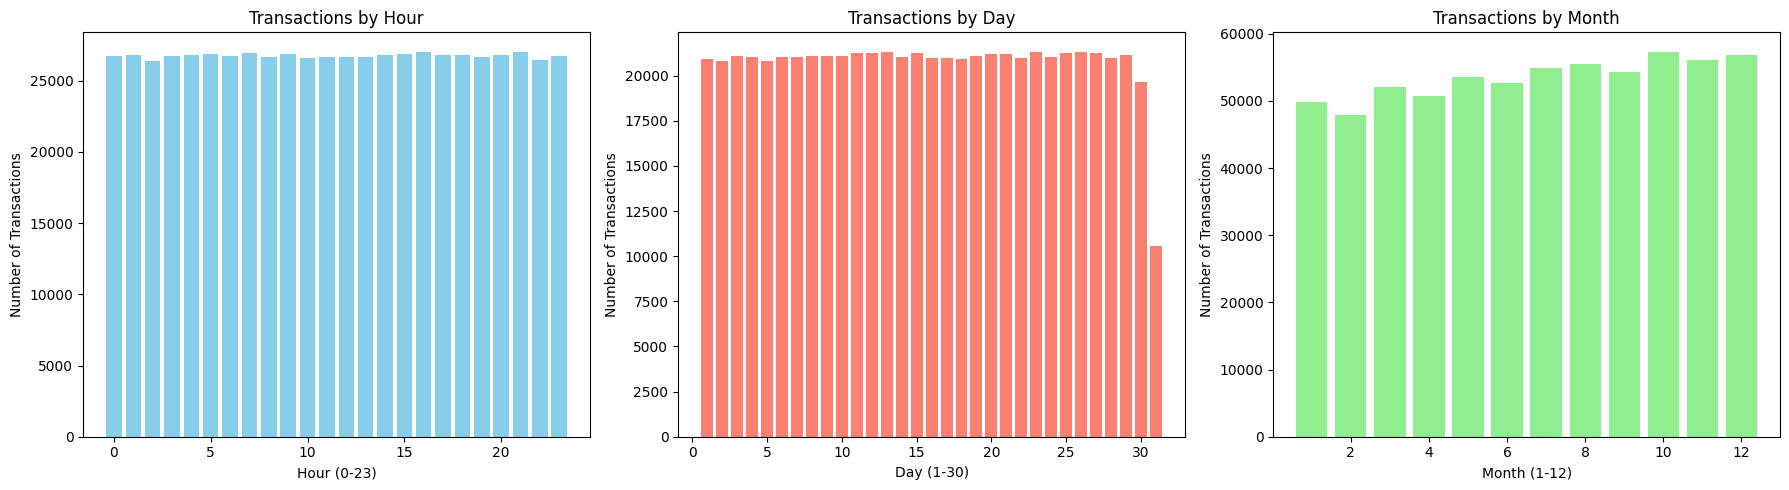

In [149]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 5))

# Plot Hours
plt.subplot(1, 3, 1)
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.title('Transactions by Hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Transactions')

# Plot Days
plt.subplot(1, 3, 2)
plt.bar(day_counts.index, day_counts.values, color='salmon')
plt.title('Transactions by Day')
plt.xlabel('Day (1-30)')
plt.ylabel('Number of Transactions')

# Plot Months
plt.subplot(1, 3, 3)
plt.bar(month_counts.index, month_counts.values, color='lightgreen')
plt.title('Transactions by Month')
plt.xlabel('Month (1-12)')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()
